In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bootstrapping function to calculate means
def bootstrap_means(df, n=1000):
    model_means = {'Apollo 1': [], 'Apollo 2': []}
    for _ in range(n):
        for model in ['Apollo 1', 'Apollo 2']:
            sample = df[df['model'] == model]['call_time'].sample(frac=1, replace=True)
            model_means[model].append(sample.mean())
    return model_means


# Function to plot the results, now with updated colors and density settings
def plot_subplots(df1, df2):
    def plot_subplot(ax, df, title, color):
        # Correct usage of sns.histplot without 'fill' in kde_kws
        sns.histplot(df['Average Call Time'], bins=40, kde=True, color=color, ax=ax, stat="density", kde_kws={'cut': 0})
        ax.set_title(title)
        ax.set_xlabel('Average Call Time (seconds)')
        ax.set_ylabel('Density')
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    plot_subplot(axes[0], df1, 'Bootstrapped Average Call Time - Apollo 1', color='lightgreen')
    plot_subplot(axes[1], df2, 'Bootstrapped Average Call Time - Apollo 2', color='plum')

    plt.tight_layout()
    plt.show()



In [4]:
np.random.seed(0) 
data = {
    'call_dt': pd.date_range(start='2024-01-01', periods=30, freq='D'),
    'model': ['Apollo 1' if x % 2 == 0 else 'Apollo 2' for x in range(30)],
    'call_time': np.random.normal(loc=300, scale=50, size=30)  # Simulated call times
}
df = pd.DataFrame(data)

In [5]:
bootstrapped_means = bootstrap_means(df)

# Convert to DataFrame for easier plotting
df_means_apollo_1 = pd.DataFrame(bootstrapped_means['Apollo 1'], columns=['Average Call Time'])
df_means_apollo_2 = pd.DataFrame(bootstrapped_means['Apollo 2'], columns=['Average Call Time'])

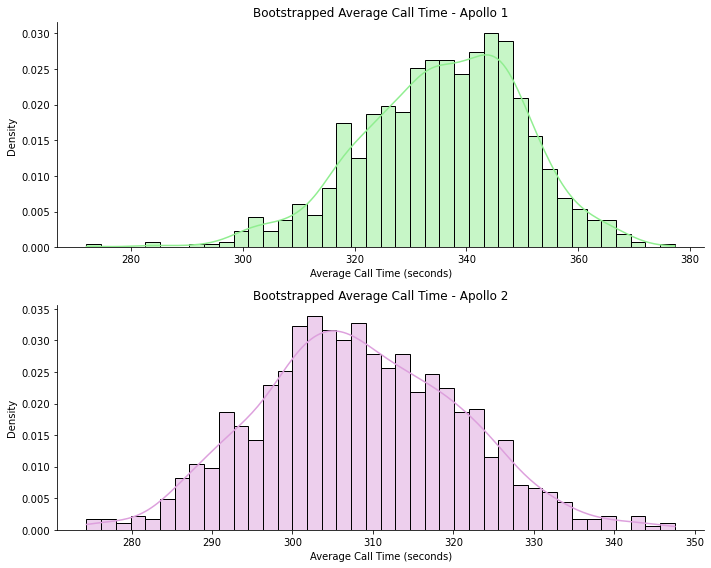

In [6]:
plot_subplots(df_means_apollo_1, df_means_apollo_2)
